# Pristine GRAPE calculation of control fields for cnot implementation

Robert Johansson (robert@riken.jp)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
#from qutip import *
#from qutip.control import *

In [3]:
T = 2 * np.pi 
times = np.linspace(0, T, 500)

In [7]:
from qutip.qip.gates import swap, rx, ry, rz, cnot
from qutip.tensor import tensor
from qutip.operators import sigmax, sigmay, sigmaz, identity, qeye

In [8]:
U = cnot()
R = 500
H_ops = [tensor(sigmax(), identity(2)),
         tensor(sigmay(), identity(2)),
         tensor(sigmaz(), identity(2)),
         tensor(identity(2), sigmax()),
         tensor(identity(2), sigmay()),
         tensor(identity(2), sigmaz()),
         tensor(sigmax(), sigmax()) +
         tensor(sigmay(), sigmay()) +
         tensor(sigmaz(), sigmaz())]

H_labels = [r'$u_{1x}$', r'$u_{1y}$', r'$u_{1z}$',
            r'$u_{2x}$', r'$u_{1y}$', r'$u_{2z}$',
            r'$u_{xx}$',
            r'$u_{yy}$',
            r'$u_{zz}$',
        ]

In [9]:
H0 = 0 * np.pi * (tensor(sigmax(), identity(2)) + tensor(identity(2), sigmax()))

c_ops = []

# This is the analytical result in the absense of single-qubit tunnelling
#g = pi/(4 * T)
#H = g * (tensor(sigmax(), sigmax()) + tensor(sigmay(), sigmay()))

# GRAPE

In [10]:
from qutip.control.grape import plot_grape_control_fields, _overlap, grape_unitary_adaptive, cy_grape_unitary

In [11]:
from scipy.interpolate import interp1d
from qutip.ui.progressbar import TextProgressBar

In [12]:
u0 = np.array([np.random.rand(len(times)) * 2 * np.pi * 0.05 for _ in range(len(H_ops))])

u0 = [np.convolve(np.ones(10)/10, u0[idx,:], mode='same') for idx in range(len(H_ops))]

u_limits = None #[0, 1 * 2 * pi]
alpha = None

In [13]:
result = cy_grape_unitary(U, H0, H_ops, R, times, u_start=u0, u_limits=u_limits,
                          eps=2*np.pi*1, alpha=alpha, phase_sensitive=False,
                          progress_bar=TextProgressBar())

10.0%. Run time:  76.70s. Est. time left: 00:00:11:30
20.0%. Run time: 153.46s. Est. time left: 00:00:10:13
30.0%. Run time: 229.83s. Est. time left: 00:00:08:56
40.0%. Run time: 306.28s. Est. time left: 00:00:07:39
50.0%. Run time: 382.86s. Est. time left: 00:00:06:22
60.0%. Run time: 459.83s. Est. time left: 00:00:05:06
70.0%. Run time: 536.38s. Est. time left: 00:00:03:49
80.0%. Run time: 612.98s. Est. time left: 00:00:02:33
90.0%. Run time: 690.63s. Est. time left: 00:00:01:16
Total run time: 766.44s


## Plot control fields for cnot gate in the presense of single-qubit tunnelling

plot_grape_control_fields(times, u, labels, uniform_axes=False):
    """
    Plot a series of plots showing the GRAPE control fields given in the
    given control pulse matrix u.

    Parameters
    ----------
    times : array
        Time coordinate array.

    u : array
        Control pulse matrix.

    labels : list
        List of labels for each control pulse sequence in the control pulse
        matrix.

    uniform_axes : bool
        Whether or not to plot all pulse sequences using the same y-axis scale.
    
    """

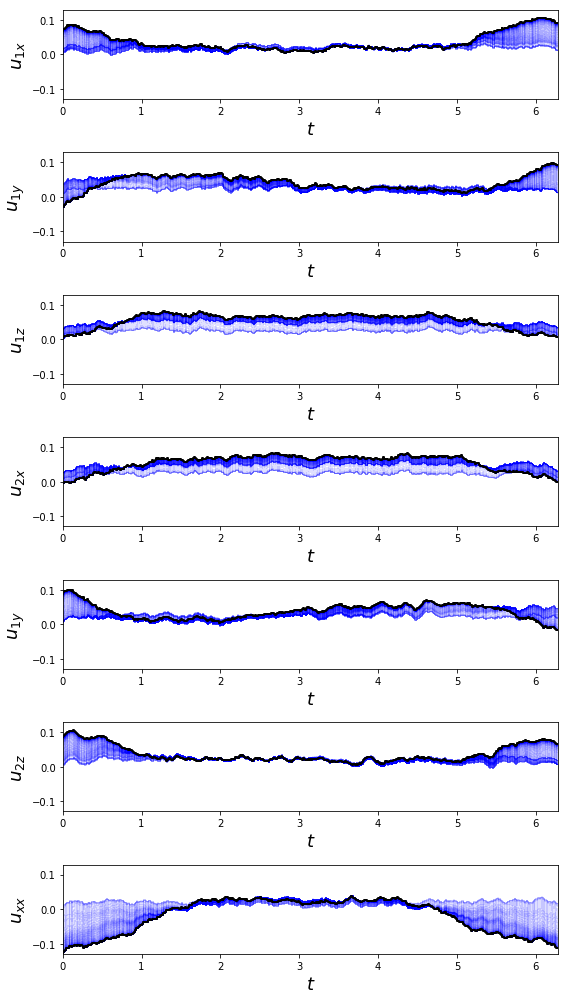

In [14]:
plot_grape_control_fields(times,
                          result.u / (2 * np.pi), H_labels, uniform_axes=True);

## Fidelity/overlap

In [15]:
U

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [16]:
result.U_f

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 7.07106781e-01+7.07106781e-01j  1.21921275e-10+1.01915548e-10j
   3.40968267e-10+4.35970934e-10j  4.13135159e-10+3.51424302e-10j]
 [-1.01914394e-10-1.21918741e-10j  7.07106781e-01+7.07106781e-01j
  -2.57449047e-10-2.92207172e-10j -3.27840503e-10-2.08632099e-10j]
 [-3.51425444e-10-4.13137707e-10j  2.08630817e-10+3.27837937e-10j
   3.95107124e-12-1.57679017e-11j  7.07106781e-01+7.07106781e-01j]
 [-4.35970372e-10-3.40968534e-10j  2.92209834e-10+2.57449185e-10j
   7.07106781e-01+7.07106781e-01j  1.57677725e-11-3.95285237e-12j]]

In [17]:
result.U_f/result.U_f[0,0]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 1.00000000e+00+0.00000000e+00j  1.58276535e-10-1.41461854e-11j
   5.49378978e-10+6.71770303e-11j  5.40625180e-10-4.36361651e-11j]
 [-1.58273927e-10-1.41452094e-11j  1.00000000e+00+8.56723026e-11j
  -3.88665640e-10-2.45777055e-11j -3.79343415e-10+8.42930702e-11j]
 [-5.40627789e-10-4.36371601e-11j  3.79340694e-10+8.42921629e-11j
  -8.35576098e-12-1.39434195e-11j  1.00000000e+00+1.27928557e-10j]
 [-5.49378769e-10+6.71764434e-11j  3.88667620e-10-2.45794910e-11j
   1.00000000e+00-9.83980120e-11j  8.35441015e-12-1.39445876e-11j]]

In [18]:
_overlap(U, result.U_f).real, abs(_overlap(U, result.U_f)) ** 2

(0.7071067811865482, 1.0000000000000022)

## Test numerical integration of GRAPE pulse

In [22]:
from qutip.propagator import propagator
from qutip.solver import Options, _solver_safety_check, config

In [23]:
U_f_numerical = propagator(
    result.H_t, times[-1], [], options=Odeoptions(nsteps=5000), args={})
U_f_numerical

NameError: name 'Odeoptions' is not defined

In [ ]:
U_f_numerical / U_f_numerical[0,0]

In [ ]:
_overlap(result.U_f, U_f_numerical).real, abs(_overlap(result.U_f, U_f_numerical))**2

# Process tomography

## Ideal cnot gate

In [ ]:
op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()]] * 2
op_label = [["i", "x", "y", "z"]] * 2

In [ ]:
fig = plt.figure(figsize=(12,6))

U_i_s = to_super(U)

chi = qpt(U_i_s, op_basis)

fig = qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

## cnot gate calculated using GRAPE

In [ ]:
fig = plt.figure(figsize=(12,6))

U_f_s = to_super(result.U_f)

chi = qpt(U_f_s, op_basis)

fig = qpt_plot_combined(chi, op_label, fig=fig, threshold=0.001)

## Versions

In [ ]:
from qutip.ipynbtools import version_table

version_table()